# Distancias y ubicación

## Importación de librerías y datos

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from math import radians, cos, sin, asin, sqrt
from scipy.stats import shapiro
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau

from EDA_function_tools import *



In [3]:
df = pd.read_excel('./data/airbnb_2.xlsx', index_col = 0)
df_puntos_interes = pd.read_excel('./data/coordenadas.xlsx')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18906 entries, 0 to 18905
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              18906 non-null  int64         
 1   host_id                         18906 non-null  int64         
 2   host_is_superhost               18906 non-null  object        
 3   name                            18906 non-null  object        
 4   host_name                       18880 non-null  object        
 5   host_since                      18880 non-null  datetime64[ns]
 6   amenities                       18906 non-null  object        
 7   host_listings_count             18880 non-null  float64       
 8   neighbourhood_cleansed          18906 non-null  object        
 9   neighbourhood_group_cleansed    18906 non-null  object        
 10  latitude                        18906 non-null  float64       
 11  longitu

In [5]:
df_puntos_interes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   puntos_turisticos  11 non-null     object 
 1   latitude           11 non-null     float64
 2   longitude          11 non-null     float64
dtypes: float64(2), object(1)
memory usage: 396.0+ bytes


## Funciones

In [6]:
# Halla la distancia entre coordenadas de dos puntos
def haversine(lat1, lon1, lat2, lon2):

      R = 6371 # radio tierra en km. 

      dLat = radians(lat2 - lat1)
      dLon = radians(lon2 - lon1)
      lat1 = radians(lat1)
      lat2 = radians(lat2)

      a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
      c = 2*asin(sqrt(a))

      return R * c

# Halla el CV (coeficiente de variación) y la distancia IQR
def cv_iqr(df,var_num):
    CV = round(df[var_num].describe().loc['std']/df[var_num].describe().loc['mean'],2)
    IQR = round(df[var_num].describe().loc['75%']-df[var_num].describe().loc['25%'],2)
    print(f'El CV (coeficiente de variación) es: {CV}\n')
    print(f'El IQR (rango intercuartílico) es de: {IQR}\n')

# Función para determinar el tipo de correlación (si es paramétrica o no)
def correlacion_numericas(df, var_num1, var_num2):
    # Prueba de Shapiro-Wilk para normalidad
    _, p1 = shapiro(df[var_num1])
    _, p2 = shapiro(df[var_num2])

    # Correlación paramétrica (Pearson) si ambos conjuntos de datos son normales
    if p1 > 0.05 and p2 > 0.05:
        corr, p_value = pearsonr(df[var_num1], df[var_num2])
        print("Correlación paramétrica (Pearson):", corr)
    else:
        if len(df)< 5000:
            # Correlación no paramétrica (Spearman) si al menos uno de los conjuntos de datos no es normal
            corr, p_value = spearmanr(df[var_num1], df[var_num2])
            print("Correlación no paramétrica (Spearman):", corr)
        else:
            # Correlación no paramétrica (Kendall) si al menos uno de los conjuntos de datos no es normal y tenemos registros por encima de 5000
            tau, p_value = kendalltau(df[var_num1], df[var_num2])
            print(f"Correlación de Kendall: {tau}")
            print(f"Valor p: {p_value}")


## Distancia a puntos turísticos

In [7]:
# Hallo la distancia entre las coordenadas de los pisos y las coordenadas de los puntos turísticos
for nombre in df_puntos_interes['puntos_turisticos']:
    variable_name = f'pdi_{nombre}'
    
    # Calcular la distancia y asignarla a la columna correspondiente en df
    for index, row in df.iterrows():
        distancia = haversine(df_puntos_interes.loc[df_puntos_interes['puntos_turisticos'] == nombre, 'latitude'].values[0],
                              df_puntos_interes.loc[df_puntos_interes['puntos_turisticos'] == nombre, 'longitude'].values[0],
                              row['latitude'],
                              row['longitude'])
        
        # Asignar la distancia a la nueva columna
        df.loc[index, variable_name] = distancia

In [8]:
# Compruebo
df.columns

Index(['id', 'host_id', 'host_is_superhost', 'name', 'host_name', 'host_since',
       'amenities', 'host_listings_count', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bedrooms', 'beds',
       'price', 'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'review_scores_rating', 'calculated_host_listings_count', 'bathrooms',
       'distrito', 'precio_m2', 'price_disc', 'accommodates_disc',
       'propietarios_disc', 'price_accommodates', 'price_bedrooms',
       'antiguedad_host', 'champion', 'segmentacion_mercado',
       'pdi_Museo Nacional del Prado', 'pdi_Palacio Real', 'pdi_Plaza Mayor',
       'pdi_Templo de Debod', 'pdi_Catedral Almudena', 'pdi_Santiago Bernabeu',
       'pdi_Mercado de San Miguel', 'pdi_Puerta de Alcalá',
       'pdi_Puerta del Sol', 'pdi_Palacio Cibeles',
       'pdi_Metropolitano (Estadio)'],
      dtype='object')

In [9]:
# Echo un vistazo
df['pdi_Museo Nacional del Prado'].value_counts

<bound method IndexOpsMixin.value_counts of 0        5.001702
1        4.309030
2        2.833462
3        1.429793
4        2.677059
           ...   
18901    1.181539
18902    1.188114
18903    1.246726
18904    1.186553
18905    1.322530
Name: pdi_Museo Nacional del Prado, Length: 18906, dtype: float64>

## Media de distancia a puntos turísticos

In [10]:
# Creo nueva variable con la media de la distancia a los puntos turísticos
df.loc[:,'media_distancia']= df[['pdi_Museo Nacional del Prado',
       'pdi_Palacio Real', 'pdi_Plaza Mayor', 'pdi_Templo de Debod',
       'pdi_Catedral Almudena', 'pdi_Santiago Bernabeu',
       'pdi_Mercado de San Miguel', 'pdi_Puerta de Alcalá',
       'pdi_Puerta del Sol', 'pdi_Palacio Cibeles',
       'pdi_Metropolitano (Estadio)']].mean(axis = 1)

In [11]:
# Reviso
df.columns

Index(['id', 'host_id', 'host_is_superhost', 'name', 'host_name', 'host_since',
       'amenities', 'host_listings_count', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bedrooms', 'beds',
       'price', 'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'review_scores_rating', 'calculated_host_listings_count', 'bathrooms',
       'distrito', 'precio_m2', 'price_disc', 'accommodates_disc',
       'propietarios_disc', 'price_accommodates', 'price_bedrooms',
       'antiguedad_host', 'champion', 'segmentacion_mercado',
       'pdi_Museo Nacional del Prado', 'pdi_Palacio Real', 'pdi_Plaza Mayor',
       'pdi_Templo de Debod', 'pdi_Catedral Almudena', 'pdi_Santiago Bernabeu',
       'pdi_Mercado de San Miguel', 'pdi_Puerta de Alcalá',
       'pdi_Puerta del Sol', 'pdi_Palacio Cibeles',
       'pdi_Metropolitano (Estadio)', 'media_distancia'],
      dtype='object')

In [12]:
# Echo vistazo.
df.media_distancia.value_counts()

media_distancia
2.008032    27
2.168509    14
1.892579    13
2.219680    13
1.911608    12
            ..
2.958300     1
2.778109     1
2.667692     1
3.085874     1
2.296189     1
Name: count, Length: 18431, dtype: int64

c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<function matplotlib.pyplot.show(close=None, block=None)>

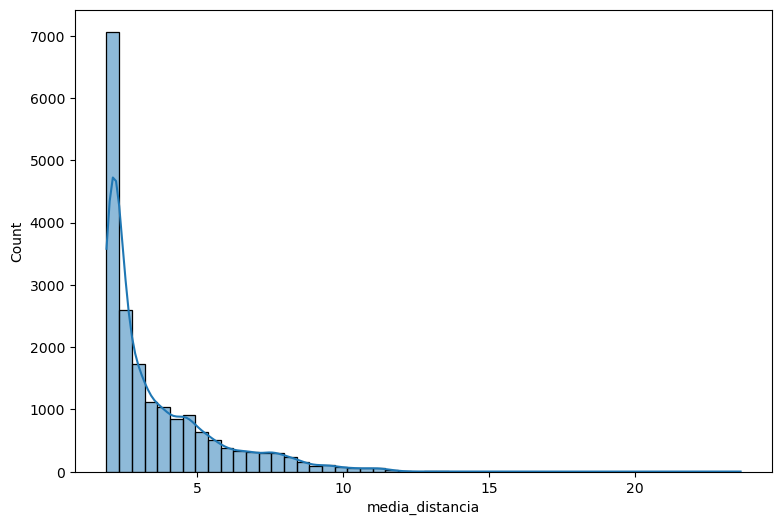

In [13]:
# Muestro su distribución
plt.figure(figsize=(9,6))
sns.histplot(x='media_distancia',data=df,bins=50,kde=True)
plt.show

In [14]:
# Hallo los primeros estadisticos
df['media_distancia'].describe().round(2)

count    18906.00
mean         3.55
std          1.96
min          1.89
25%          2.13
50%          2.71
75%          4.40
max         23.62
Name: media_distancia, dtype: float64

In [15]:
cv_iqr(df,'media_distancia')

El CV (coeficiente de variación) es: 0.55

El IQR (rango intercuartílico) es de: 2.27



## Relación entre la media de distancia y el precio de alquiler (df general)

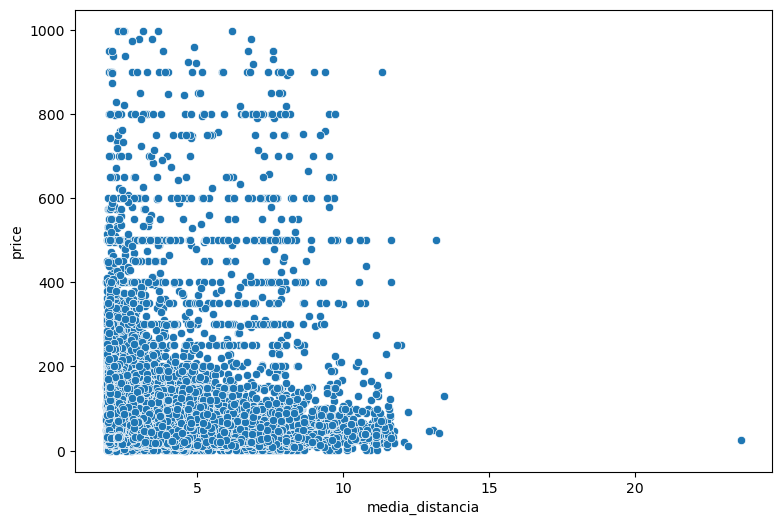

In [16]:
plt.figure(figsize=(9,6))
sns.scatterplot(x='media_distancia',y='price',data=df)
plt.show;

In [17]:
correlacion_numericas(df,'price','media_distancia')

Correlación de Kendall: -0.16220885284467892
Valor p: 4.389958017827809e-243


C:\Users\Alfonso\AppData\Local\Temp\ipykernel_14484\1576836209.py:26: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 18906.
  _, p1 = shapiro(df[var_num1])
C:\Users\Alfonso\AppData\Local\Temp\ipykernel_14484\1576836209.py:27: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 18906.
  _, p2 = shapiro(df[var_num2])


Parece que a medida que la distancia aumenta, el precio disminuye

## Relación entre precio m2 y media de la distancia (df general)

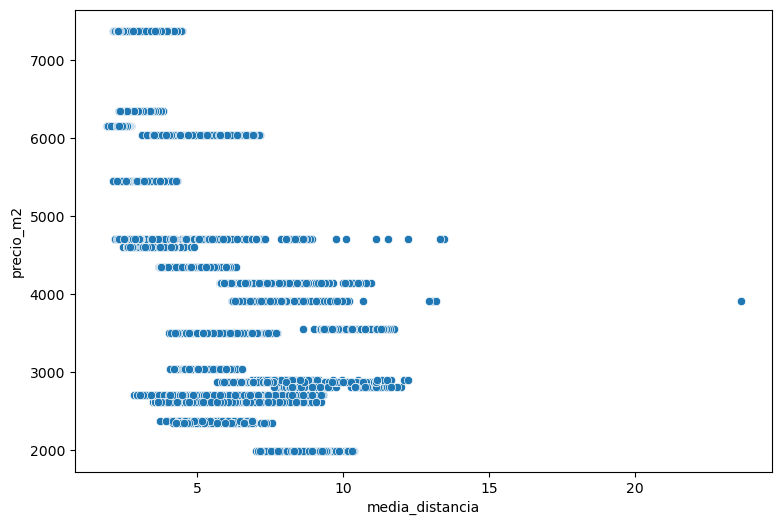

In [18]:
plt.figure(figsize=(9,6))
sns.scatterplot(x='media_distancia',y='precio_m2',data=df)
plt.show;

In [19]:
correlacion_numericas(df,'precio_m2','media_distancia')

Correlación de Kendall: -0.45957423393198304
Valor p: 0.0


C:\Users\Alfonso\AppData\Local\Temp\ipykernel_14484\1576836209.py:26: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 18906.
  _, p1 = shapiro(df[var_num1])
C:\Users\Alfonso\AppData\Local\Temp\ipykernel_14484\1576836209.py:27: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 18906.
  _, p2 = shapiro(df[var_num2])


Parece que a medida que la distancia aumenta, el precio por m2 disminuye

### Pisos que se encuentren entre los siguientes factores:
- precio de compra <= 4700
- precio de alquiler >=70
- distancia media a puntos turísticos <= 2.71
- el nº de accommodates: entre 3 y 4
- tipo de oferta = 'Entire home/apt'

In [20]:
df.query('precio_m2 <=4700 and price >= 70 and media_distancia <= 2.71 and 3 < accommodates >=4')

,id,host_id,host_is_superhost,name,host_name,host_since,amenities,host_listings_count,neighbourhood_cleansed,neighbourhood_group_cleansed,...,pdi_Plaza Mayor,pdi_Templo de Debod,pdi_Catedral Almudena,pdi_Santiago Bernabeu,pdi_Mercado de San Miguel,pdi_Puerta de Alcalá,pdi_Puerta del Sol,pdi_Palacio Cibeles,pdi_Metropolitano (Estadio),media_distancia
1302,6279864,22392452,f,Apartment with terrace and views at Madrid,Eva,2014-10-11,"[""Wifi"", ""Shampoo"", ""Dishes and silverware"", ""...",1.0,Casa de Campo,Moncloa - Aravaca,...,1.386693,0.310713,0.941641,4.370601,1.273296,2.715983,1.581533,2.460341,10.386580,2.618131
1516,7073032,11071264,f,Charming apartment in Plaza España,Clara,2014-01-06,"[""Wifi"", ""Shampoo"", ""Iron"", ""First aid kit"", ""...",1.0,Argüelles,Moncloa - Aravaca,...,0.879754,0.433810,0.564399,4.250733,0.784891,2.218411,1.055090,1.950802,9.938235,2.225789
1539,7166650,37536319,f,Apartamento situado en principe pío,Pedro Ángel,2015-07-05,"[""Wifi"", ""Shampoo"", ""Dishes and silverware"", ""...",1.0,Argüelles,Moncloa - Aravaca,...,0.979792,0.400502,0.578924,4.349007,0.869630,2.364500,1.181619,2.094492,10.086324,2.316685
2048,9856865,50736423,f,Cozy Flat located in the Centre of Madrid!,Maddy,2015-12-07,"[""Shampoo"", ""First aid kit"", ""Stove"", ""Long te...",1.0,Palos de Moguer,Arganzuela,...,1.500280,2.798596,1.989890,5.215573,1.608663,1.612270,1.408321,1.402938,8.679412,2.653745
2129,10275785,52847482,f,Apart-Hotel Jardines de Sabatini***,Jardines De Sabatini,2015-12-31,"[""Wifi"", ""Shampoo"", ""Iron"", ""Essentials"", ""TV ...",1.0,Argüelles,Moncloa - Aravaca,...,1.031752,0.270758,0.748255,4.116334,0.949912,2.261577,1.169938,2.009381,9.940213,2.290169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17486,50172622,404920382,f,Charming Plaza de España Vanguard - RENOVADO,Marazza Inversiones SL,2021-06-02,"[""Induction stove"", ""Shampoo"", ""Central heatin...",0.0,Argüelles,Moncloa - Aravaca,...,1.091518,0.379331,0.943556,3.848893,1.045240,2.108110,1.149577,1.879253,9.727820,2.272241
17770,50521660,391810099,f,SPACIOUS FLAT ATOCHA,Alberto,2021-03-09,"[""Wifi"", ""Microwave"", ""Dishes and silverware"",...",20.0,Palos de Moguer,Arganzuela,...,1.416235,2.717057,1.859869,5.338705,1.506814,1.778968,1.380629,1.542231,8.924156,2.681329
17838,50646968,52106246,f,*Ático tipico / Penthouse 95m² - last floor*,Mathilde,2015-12-23,"[""Wifi"", ""Outdoor furniture"", ""Air conditionin...",0.0,Argüelles,Moncloa - Aravaca,...,1.623062,0.364239,1.338025,3.843290,1.552050,2.627598,1.712816,2.419259,10.129628,2.672789
18123,51068551,220103569,t,RONDA DE ATOCHA - a estrenar ¡!,MadreamsRent,2018-10-11,"[""Shampoo"", ""Long term stays allowed"", ""Wifi"",...",49.0,Palos de Moguer,Arganzuela,...,1.271075,2.564301,1.682515,5.338075,1.348718,1.836841,1.277115,1.576515,9.099440,2.629876


In [21]:
df_ideal_apartamento = df.query('precio_m2 <= 4700 and price >= 70 and media_distancia <= 2.71 and 3 < accommodates <= 4 and room_type == "Entire home/apt" and champion == False')

In [22]:
df_ideal_apartamento.describe().round(2).T

,count,mean,min,25%,50%,75%,max,std
id,48.0,29238353.92,6279864.0,21237266.75,29974589.0,39602073.75,51068551.0,11970815.38
host_id,48.0,123139260.4,745850.0,36773727.25,82307568.5,196395456.0,404920382.0,106818573.03
host_since,48,2016-11-21 20:00:00,2011-06-26 00:00:00,2015-08-04 06:00:00,2016-08-19 12:00:00,2018-06-18 00:00:00,2021-06-02 00:00:00,NaN
host_listings_count,48.0,16.83,0.0,0.75,1.0,11.25,112.0,29.81
latitude,48.0,40.42,40.41,40.41,40.42,40.42,40.43,0.01
longitude,48.0,-3.71,-3.72,-3.72,-3.71,-3.71,-3.69,0.01
accommodates,48.0,4.0,4.0,4.0,4.0,4.0,4.0,0.0
bedrooms,48.0,1.38,1.0,1.0,1.0,2.0,2.0,0.49
beds,48.0,2.02,0.0,1.0,2.0,3.0,4.0,0.86
price,48.0,135.52,70.0,84.75,108.5,158.5,575.0,84.66


In [23]:
df_ideal_apartamento[['distrito','neighbourhood_cleansed']].value_counts()

distrito           neighbourhood_cleansed
Moncloa - Aravaca  Argüelles                 29
Arganzuela         Palos de Moguer           10
Moncloa - Aravaca  Casa de Campo              4
Arganzuela         Imperial                   3
                   Acacias                    1
                   Atocha                     1
Name: count, dtype: int64

In [34]:
df_ideal_apartamento.to_excel('./data/ideal_apartamento.xlsx')

### Pisos que se encuentren entre los siguientes factores (sin distancia):
- precio de compra <= 4595 (por debajo del 25%)
- precio de alquiler >=103 (por encima del 75%)
- el nº de accommodates: entre 3 y más de 4
- tipo de oferta = 'Entire home/apt'

In [41]:
df.query('precio_m2 <=4595 and price >= 103 and 3 < accommodates >=4')

,id,host_id,host_is_superhost,name,host_name,host_since,amenities,host_listings_count,neighbourhood_cleansed,neighbourhood_group_cleansed,...,pdi_Plaza Mayor,pdi_Templo de Debod,pdi_Catedral Almudena,pdi_Santiago Bernabeu,pdi_Mercado de San Miguel,pdi_Puerta de Alcalá,pdi_Puerta del Sol,pdi_Palacio Cibeles,pdi_Metropolitano (Estadio),media_distancia
68,260951,1351865,t,"Spectacular Loft ""A"" Ifema Madrid",Angela Y Jaime,2011-10-30,"[""Paid parking on premises"", ""Stove"", ""Long te...",4.0,Valdefuentes,Hortaleza,...,9.099260,9.160276,9.508237,5.388625,9.221901,7.619643,8.772602,7.920256,4.725644,8.100660
84,336672,1716726,f,Great apartment ∞4 rooms∞ close to City Center,Jesús,2012-02-07,"[""Shampoo"", ""Pack \u2019n Play/travel crib"", ""...",5.0,Delicias,Arganzuela,...,2.555273,3.831763,2.903880,6.450677,2.618710,2.816652,2.564923,2.639756,9.143097,3.700296
167,541406,2661721,f,Enjoy madrid with all your family,Tony,2012-06-17,[],1.0,Costillares,Ciudad Lineal,...,6.905713,6.631317,7.190063,2.572794,6.997788,5.747591,6.622745,5.990250,6.741177,6.263799
218,685152,3494012,f,house-hotel,Farah Maria,2012-09-06,"[""First aid kit"", ""Stove"", ""Long term stays al...",4.0,Pinar del Rey,Hortaleza,...,7.737586,7.644937,8.091846,3.720678,7.847032,6.390494,7.428069,6.668528,5.675968,6.932984
261,760482,4008643,t,Dúplex-Penthouse Cuzco-Castellana Smart,Antonio : Smart Apartments Madrid,2012-10-29,"[""Shampoo"", ""Safe"", ""First aid kit"", ""Pack \u2...",4.0,Castillejos,Tetuán,...,5.064830,4.438376,5.189300,0.931264,5.114874,4.430686,4.859074,4.564017,8.482363,4.832377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18670,51858384,419747561,f,El Apartamento de Diseño de Portalegre,Holplace,2021-08-23,"[""Shampoo"", ""Long term stays allowed"", ""Bathtu...",0.0,Opañel,Carabanchel,...,3.185088,3.862872,3.008092,7.668759,3.106607,4.515684,3.462138,4.217515,11.733612,4.710360
18671,51858387,419747561,f,El Mirador de Palacio,Holplace,2021-08-23,"[""Shampoo"", ""Long term stays allowed"", ""Wifi"",...",0.0,Puerta del Angel,Latina,...,1.565695,1.303935,0.991900,5.374648,1.410832,3.202600,1.890670,2.899265,10.976264,3.049010
18708,51879774,410526484,f,apartamento en nuevos ministerios con todas la...,Gonzalo,2021-07-02,"[""Free dryer \u2013 In unit"", ""Shampoo"", ""Safe...",0.0,Cuatro Caminos,Tetuán,...,4.112050,3.614226,4.285009,0.508541,4.173290,3.418984,3.887560,3.553561,8.132056,3.987417
18850,52121692,408883764,f,PISO GRANDE LUMINOSO MUY BUENA COMUNICACION M30,Gloria Estela,2021-06-24,"[""Wifi"", ""Dedicated workspace: desk"", ""Cleanin...",0.0,San Diego,Puente de Vallecas,...,4.139877,5.426500,4.633322,6.920947,4.253723,3.517977,4.000059,3.531283,7.601143,4.716064


In [42]:
df_ideal_apartamento_sd = df.query('precio_m2 <= 4595 and price >= 103 and 3 < accommodates <= 4 and room_type == "Entire home/apt" and champion == False')

In [43]:
df_ideal_apartamento_sd.describe().round(2).T

,count,mean,min,25%,50%,75%,max,std
id,173.0,32787573.57,989063.0,26608176.0,34619471.0,41420607.0,52137330.0,11716759.2
host_id,173.0,139964089.13,745850.0,39809136.0,99018982.0,241239053.0,401899886.0,117076339.62
host_since,173,2017-01-15 21:38:29.826589696,2011-06-26 00:00:00,2015-07-28 00:00:00,2016-10-10 00:00:00,2019-02-05 00:00:00,2021-05-16 00:00:00,NaN
host_listings_count,173.0,10.95,0.0,1.0,1.0,5.0,212.0,29.72
latitude,173.0,40.44,40.34,40.4,40.44,40.46,40.51,0.04
longitude,173.0,-3.68,-3.76,-3.7,-3.69,-3.66,-3.57,0.04
accommodates,173.0,4.0,4.0,4.0,4.0,4.0,4.0,0.0
bedrooms,173.0,1.84,1.0,1.0,2.0,2.0,4.0,0.7
beds,173.0,2.39,0.0,2.0,2.0,3.0,5.0,0.89
price,173.0,240.49,103.0,120.0,150.0,236.0,975.0,200.49


In [44]:
df_ideal_apartamento_sd[['distrito','neighbourhood_cleansed']].value_counts()

distrito               neighbourhood_cleansed      
Tetuán                 Castillejos                     16
Hortaleza              Valdefuentes                    13
Arganzuela             Palos de Moguer                 13
Tetuán                 Almenara                         9
                       Cuatro Caminos                   9
                       Bellas Vistas                    7
Latina                 Puerta del Angel                 6
Carabanchel            Opañel                           6
San Blas - Canillejas  Simancas                         6
Arganzuela             Chopera                          5
Tetuán                 Berruguete                       4
Puente de Vallecas     San Diego                        4
Fuencarral - El Pardo  Valverde                         4
Ciudad Lineal          San Juan Bautista                3
San Blas - Canillejas  Arcos                            3
Hortaleza              Pinar del Rey                    3
Fuencarral - El Pard

In [45]:
df_ideal_apartamento_sd.to_excel('./data/ideal_apartamento_sd.xlsx')

### Pisos 'Private room' que se encuentren entre los siguientes factores:
- precio de compra <= 4700
- precio de alquiler >=33
- distancia media a puntos turísticos <= 2.71
- el nº de accommodates entre 1 y 2
- tipo de oferta = 'Private room'


In [30]:
df_ideal_private = df.query('precio_m2 <= 4700 and price >= 33 and media_distancia <= 2.71 and 1 < accommodates <= 2 and room_type == "Private room" and champion == False')

In [31]:
df_ideal_private.describe().round(2).T

,count,mean,min,25%,50%,75%,max,std
id,40.0,29348619.32,4433188.0,19580037.0,26254128.0,39621232.75,51036855.0,13220593.43
host_id,40.0,149122310.0,1955050.0,24357505.0,128600625.0,223249903.5,410089579.0,134553288.07
host_since,40,2017-01-14 07:48:00,2012-03-18 00:00:00,2014-12-03 06:00:00,2017-05-03 00:00:00,2018-10-19 00:00:00,2021-06-30 00:00:00,NaN
host_listings_count,40.0,1.78,0.0,1.0,1.0,2.0,6.0,1.59
latitude,40.0,40.42,40.41,40.41,40.41,40.43,40.43,0.01
longitude,40.0,-3.71,-3.72,-3.72,-3.71,-3.69,-3.69,0.01
accommodates,40.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0
bedrooms,40.0,1.1,1.0,1.0,1.0,1.0,3.0,0.38
beds,40.0,1.12,0.0,1.0,1.0,1.0,2.0,0.46
price,40.0,68.6,35.0,40.0,50.5,58.5,536.0,84.35


In [32]:
df_ideal_private[['distrito','neighbourhood_cleansed']].value_counts()

distrito           neighbourhood_cleansed
Arganzuela         Palos de Moguer           16
Moncloa - Aravaca  Argüelles                 15
Arganzuela         Imperial                   5
Moncloa - Aravaca  Casa de Campo              3
Arganzuela         Atocha                     1
Name: count, dtype: int64

In [33]:
df_ideal_private.to_excel('./data/ideal_private.xlsx')